# Predicting Evergreeness of Content with Decision Trees and Random Forests

In [3]:
%matplotlib inline

In [2]:
import pandas as pd
import json

data = pd.read_csv("../../assets/dataset/stumbleupon.tsv", sep='\t')
data['title'] = data.boilerplate.map(lambda x: json.loads(x).get('title', ''))
data['body'] = data.boilerplate.map(lambda x: json.loads(x).get('body', ''))
data.dropna()
data.head()

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label,title,body
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,...,24,0,5424,170,8,0.152941,0.079130,0,IBM Sees Holographic Calls Air Breathing Batte...,A sign stands outside the International Busine...
1,http://www.popsci.com/technology/article/2012-...,8471,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,...,40,0,4973,187,9,0.181818,0.125448,1,The Fully Electronic Futuristic Starting Gun T...,And that can be carried on a plane without the...
2,http://www.menshealth.com/health/flu-fighting-...,1164,"{""title"":""Fruits that Fight the Flu fruits tha...",health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,...,55,0,2240,258,11,0.166667,0.057613,1,Fruits that Fight the Flu fruits that fight th...,Apples The most popular source of antioxidants...
3,http://www.dumblittleman.com/2007/12/10-foolpr...,6684,"{""title"":""10 Foolproof Tips for Better Sleep ""...",health,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,...,24,0,2737,120,5,0.041667,0.100858,1,10 Foolproof Tips for Better Sleep,There was a period in my life when I had a lot...
4,http://bleacherreport.com/articles/1205138-the...,9006,"{""title"":""The 50 Coolest Jerseys You Didn t Kn...",sports,0.719157,2.676471,0.500000,0.222222,0.123457,0.043210,...,14,0,12032,162,10,0.098765,0.082569,0,The 50 Coolest Jerseys You Didn t Know Existed...,Jersey sales is a curious business Whether you...


## Predicting "Greenness" Of Content

This dataset comes from [stumbleupon](https://www.stumbleupon.com/), a web page recommender. A description of the columns is below:

FieldName|Type|Description
---------|----|-----------
url|string|Url of the webpage to be classified
title|string|Title of the article
body|string|Body text of article
urlid|integer| StumbleUpon's unique identifier for each url
boilerplate|json|Boilerplate text
alchemy_category|string|Alchemy category (per the publicly available Alchemy API found at www.alchemyapi.com)
alchemy_category_score|double|Alchemy category score (per the publicly available Alchemy API found at www.alchemyapi.com)
avglinksize| double|Average number of words in each link
commonlinkratio_1|double|# of links sharing at least 1 word with 1 other links / # of links
commonlinkratio_2|double|# of links sharing at least 1 word with 2 other links / # of links
commonlinkratio_3|double|# of links sharing at least 1 word with 3 other links / # of links
commonlinkratio_4|double|# of links sharing at least 1 word with 4 other links / # of links
compression_ratio|double|Compression achieved on this page via gzip (measure of redundancy)
embed_ratio|double|Count of number of <embed> usage
frameBased|integer (0 or 1)|A page is frame-based (1) if it has no body markup but have a frameset markup
frameTagRatio|double|Ratio of iframe markups over total number of markups
hasDomainLink|integer (0 or 1)|True (1) if it contains an <a> with an url with domain
html_ratio|double|Ratio of tags vs text in the page
image_ratio|double|Ratio of <img> tags vs text in the page
is_news|integer (0 or 1) | True (1) if StumbleUpon's news classifier determines that this webpage is news
lengthyLinkDomain| integer (0 or 1)|True (1) if at least 3 <a> 's text contains more than 30 alphanumeric characters
linkwordscore|double|Percentage of words on the page that are in hyperlink's text
news_front_page| integer (0 or 1)|True (1) if StumbleUpon's news classifier determines that this webpage is front-page news
non_markup_alphanum_characters|integer| Page's text's number of alphanumeric characters
numberOfLinks|integer Number of <a>|markups
numwords_in_url| double|Number of words in url
parametrizedLinkRatio|double|A link is parametrized if it's url contains parameters or has an attached onClick event
spelling_errors_ratio|double|Ratio of words not found in wiki (considered to be a spelling mistake)
label|integer (0 or 1)|User-determined label. Either evergreen (1) or non-evergreen (0); available for train.tsv only

### What are 'evergreen' sites?

> #### Evergreen sites are those that are always relevant.  As opposed to breaking news or current events, evergreen websites are relevant no matter the time or season. 

> #### A sample of URLs is below, where label = 1 are 'evergreen' websites

In [4]:
data['label'].mean()

0.5133198106828939

In [5]:
data[data['label'] == 1]['url']

1       http://www.popsci.com/technology/article/2012-...
2       http://www.menshealth.com/health/flu-fighting-...
3       http://www.dumblittleman.com/2007/12/10-foolpr...
6       http://gofashionlane.blogspot.tw/2012/06/ameri...
8       http://www.valetmag.com/the-handbook/features/...
9       http://www.howsweeteats.com/2010/03/24/cookies...
12      http://www.ivillage.com/our-dirty-mouths/4-b-1...
13      http://www.thedailygreen.com/print-this/health...
18      http://sugarcrafter.net/2011/06/06/grilled-pea...
19      http://www.ivillage.com/bathroom-degrunge-your...
21      http://www.bbc.co.uk/food/recipes/blueberry_an...
23      http://www.monicel.info/2008/08/03/original-te...
24      http://blogs.babble.com/family-kitchen/2011/04...
28      http://humor.cool-been.com/wp/supermodels-show...
29      http://sportsillustrated.cnn.com/2011_swimsuit...
30           http://www.tammysrecipes.com/homemade_bagels
31      http://www.savvyeat.com/whole-wheat-chocolate-...
33      http:/

In [5]:
#Let's see if being a news site affects Evergreeness
data.columns
print data['is_news'].value_counts()
print data[data['is_news'] == '1']['label'].mean()
print data[data['is_news'] == '?']['label'].mean()

1    4552
?    2843
Name: is_news, dtype: int64
0.516915641476
0.507562434049


### Exercises to Get Started

> ### Exercise: 1. In a group: Brainstorm 3 - 5 features you could develop that would be useful for predicting evergreen websites.
 ###  Exercise: 2. After looking at the dataset, can you model or quantify any of the characteristics you wanted?
- I.E. If you believe high-image content websites are likely to be evergreen, how can you build a feature that represents that?
- I.E. If you believe weather content is likely NOT to be evergreen, how might you build a feature that represents that?

### Split up and develop 1-3 of the those features independently.

> ### Exercise: 3. Does being a news site affect evergreeness? 
Compute or plot the percentage of news related evergreen sites.

Answer: NO

In [ ]:
# ... #


> ### Exercise: 4. Does category in general affect evergreeness? 
Plot the rate of evergreen sites for all Alchemy categories.

In [6]:
data['alchemy_category'].value_counts()

?                     2342
recreation            1229
arts_entertainment     941
business               880
health                 506
sports                 380
culture_politics       343
computer_internet      296
science_technology     289
gaming                  76
religion                72
law_crime               31
unknown                  6
weather                  4
Name: alchemy_category, dtype: int64

([<matplotlib.axis.YTick at 0x7fd78278afd0>,
 <a list of 14 Text yticklabel objects>)

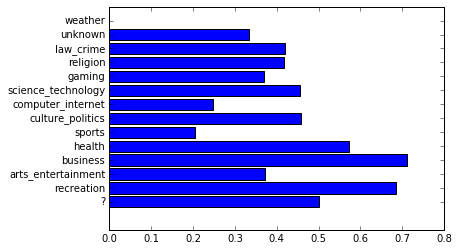

In [40]:
import matplotlib.pyplot as plt
import numpy as np

topics = list(data['alchemy_category'].value_counts().index)
topic_means = [data[data['alchemy_category'] == topic]['label'].mean() for topic in topics]

x_pos = np.arange(len(topics))

plt.barh(x_pos,topic_means,align = 'center')
plt.yticks(x_pos,topics)


> ### Exercise: 5. How many articles are there per category?

In [41]:
data['alchemy_category'].value_counts()

?                     2342
recreation            1229
arts_entertainment     941
business               880
health                 506
sports                 380
culture_politics       343
computer_internet      296
science_technology     289
gaming                  76
religion                72
law_crime               31
unknown                  6
weather                  4
Name: alchemy_category, dtype: int64

> #### Let's try extracting some of the text content.
> ### Exercise: 6. Create a feature for the title containing 'recipe'. 
Is the % of evegreen websites higher or lower on pages that have recipe in the the title?

In [9]:
data['recipe_in_title'] = data['title'].apply(lambda x: 'recipe' in unicode(x)) + 0
data['recipe_in_title'].value_counts()

0    7042
1     353
Name: recipe_in_title, dtype: int64

###  Let's Explore Some Decision Trees

 ### Demo: Build a decision tree model to predict the "evergreeness" of a given website. 

In [10]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

X = data[['image_ratio', 'html_ratio', 'recipe_in_title', 'label']].dropna()
y = X['label']
X.drop('label', axis=1, inplace=True)

print X.head()
    
# Fits the model
model.fit(X, y)

# Helper function to visualize Decision Trees (creates a file tree.png)

from sklearn.tree import export_graphviz
from os import system 
def build_tree_image(model):
    dotfile = open("tree.dot", 'w')
    export_graphviz(model,
                              out_file = dotfile,
                              feature_names = X.columns)
    dotfile.close()
    system("dot -Tpng tree.dot -o tree.png")
    
build_tree_image(model)

   image_ratio  html_ratio  recipe_in_title
0     0.003883    0.245831                0
1     0.088652    0.203490                0
2     0.120536    0.226402                0
3     0.035343    0.265656                0
4     0.050473    0.228887                0


## Decision Trees in scikit-learn

 ### Exercise: Evaluate the decision tree using cross-validation; use AUC as the evaluation metric.

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score


X = data[['image_ratio', 'html_ratio', 'recipe_in_title', 'label']].dropna()
y = X['label']
X.drop('label', axis=1, inplace=True)

scores = cross_val_score(DecisionTreeClassifier(),X,y,scoring = 'roc_auc',cv=5)
print scores


[ 0.52540205  0.52187363  0.52956467  0.52607598  0.55191572]


###  Adjusting Decision Trees to Avoid Overfitting

 ### Demo: Control for overfitting in the decision model by adjusting the maximum number of questions (max_depth) or the minimum number of records in each final node (min_samples_leaf)

In [12]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score
from itertools import product


X = data[['image_ratio', 'html_ratio', 'recipe_in_title', 'label']].dropna()
y = X['label']
X.drop('label', axis=1, inplace=True)

scores = np.zeros((6,100))
max_depths = np.arange(1,101,1)
min_samples = np.arange(1,7,1)

for m_depth,m_sample in product(max_depths,min_samples):
    
    score = cross_val_score(DecisionTreeClassifier(max_depth = m_depth,min_samples_leaf=m_sample),X,y,scoring = 'roc_auc',cv=5)
    scores[(m_sample - 1),(m_depth - 1)] = score.mean()

print scores[:2,:10]
#model = DecisionTreeClassifier(
#                max_depth = 2,
#                min_samples_leaf = 5)

#model.fit(X, y)
#build_tree_image(model)

[[ 0.53621169  0.57547448  0.58754285  0.59903468  0.60816305  0.61189105
   0.61055833  0.60629081  0.60638771  0.59691899]
 [ 0.53621169  0.57547448  0.58754285  0.59956465  0.60808633  0.61151256
   0.6089365   0.60704235  0.60246985  0.5952748 ]]


#### Cool Tree visualization!

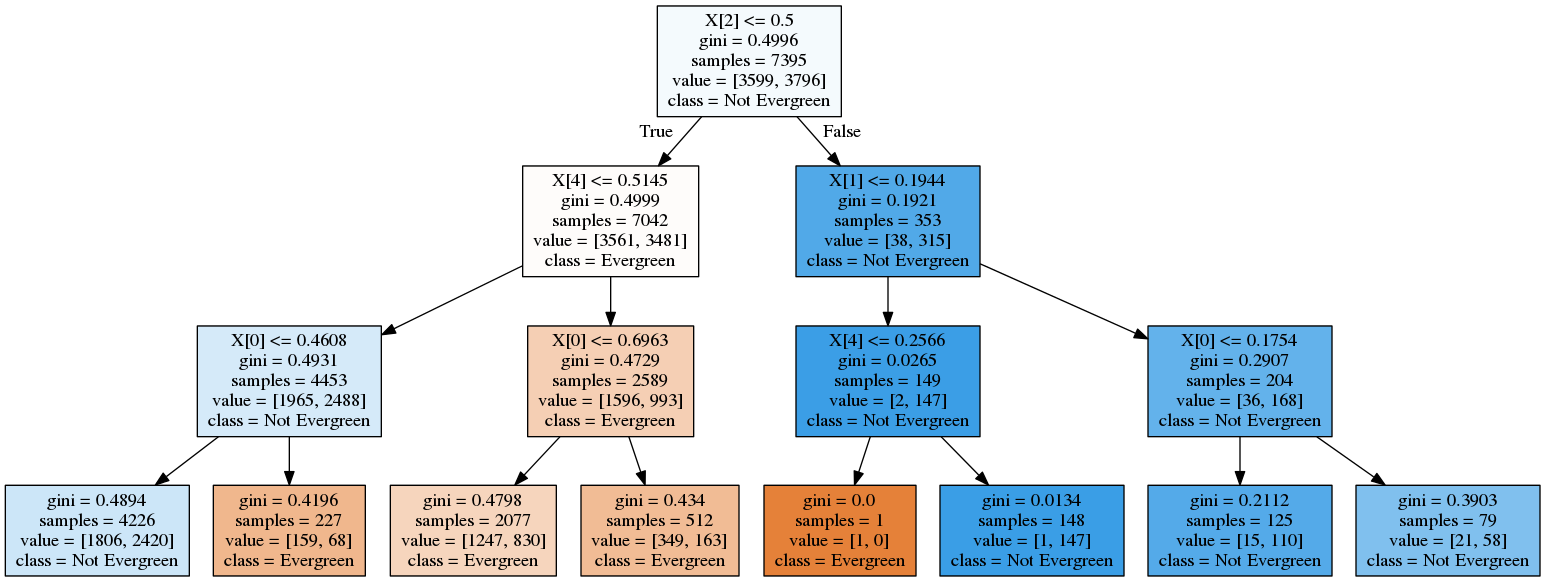

In [67]:
#StringIO is a way for text to behave as a file.
#Typically the text 'file' is written to the terminal
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydot
model = DecisionTreeClassifier(max_depth = 3,min_samples_leaf=1)
model.fit(X,y)

dotfile = StringIO()
export_graphviz(model,out_file = dotfile,filled = True,class_names = ['Evergreen','Not Evergreen'])
#dotfile.get_value()
graph = pydot.graph_from_dot_data(dotfile.getvalue())
Image(graph.create_png())

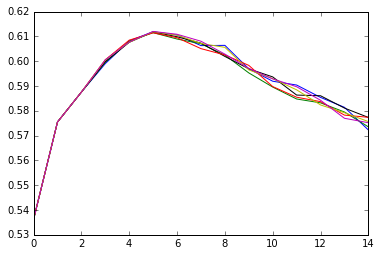

In [15]:
import matplotlib.pyplot as plt
colors = ['b','g','black','r','y','m']

for idx,c in enumerate(colors):
    plt.plot(scores[idx,:15],color = c,label = 'min_samples = ' + str(idx+1))

#plt.legend(loc = 1)


 ### Demo: Build a random forest model to predict the evergreeness of a website. 

In [58]:
from sklearn.ensemble import RandomForestClassifier

num_trees = np.arange(1,101,1)
scores = np.zeros(100)

for num_tree in num_trees:
    score = cross_val_score(RandomForestClassifier(n_estimators = num_tree),X,y,scoring = 'roc_auc',cv=5)
    scores[num_tree - 1] = score.mean()

print scores

[ 0.53005558  0.56045305  0.56318631  0.56205156  0.56957174  0.57084314
  0.56648446  0.57274682  0.57101368  0.57224116  0.5738439   0.57956179
  0.57526399  0.57679124  0.5778683   0.57241497  0.57796067  0.57490229
  0.57888964  0.574608    0.57486782  0.57795245  0.5785359   0.57807701
  0.5766597   0.57851253  0.58075994  0.5803959   0.58176474  0.58023978
  0.57960181  0.5775685   0.5819482   0.57948157  0.58130283  0.578962
  0.57949856  0.57884088  0.57689496  0.57843591  0.57953278  0.57925718
  0.57659224  0.57907839  0.57972216  0.58200437  0.57919488  0.57859361
  0.5810918   0.58401158  0.57841302  0.58034444  0.58185263  0.57883894
  0.57545537  0.58041321  0.57736469  0.58109175  0.57833866  0.58086745
  0.5825715   0.58163937  0.57915806  0.58085785  0.57904371  0.57721771
  0.57956644  0.58077473  0.57956203  0.57989033  0.57942755  0.58235599
  0.58131912  0.58239989  0.57993139  0.58215537  0.58156752  0.58019208
  0.58061753  0.58316669  0.58256748  0.57831476  0.5

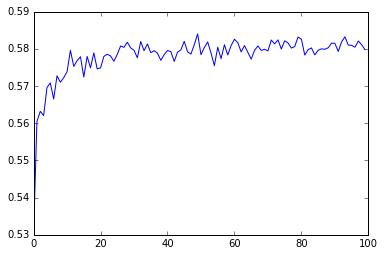

In [59]:
plt.plot(scores)

### Demo: Extracting importance of features

In [61]:
model = RandomForestClassifier(n_estimators = 40)
model.fit(X,y)

features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort('Importance Score', inplace=True, ascending=False)

features_df.head()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Features,Importance Score
1,html_ratio,0.525701
0,image_ratio,0.445183
2,recipe_in_title,0.029116


 ### Exercise: Evaluate the Random Forest model using cross-validation; increase the number of estimators and view how that improves predictive performance.

In [ ]:
# ... #

##  Independent Practice: Evaluate Random Forest Using Cross-Validation

1. Continue adding input variables to the model that you think may be relevant
2. For each feature:
  - Evaluate the model for improved predictive performance using cross-validation
  - Evaluate the _importance_ of the feature
  - 
3. **Bonus**: Just like the 'recipe' feature, add in similar text features and evaluate their performance.


In [74]:
X = data[['image_ratio', 'html_ratio', 'recipe_in_title','parametrizedLinkRatio','label']].dropna()
y = X['label']
X.drop('label', axis=1, inplace=True)

#X = data[['image_ratio', 'html_ratio', 'recipe_in_title','parametrizedLinkRatio','compression_ratio', 'label']].dropna()
#y = X['label']
#X.drop('label', axis=1, inplace=True)

num_trees = np.arange(1,40,1)
scores = np.zeros(100)

for num_tree in num_trees:
    score = cross_val_score(RandomForestClassifier(n_estimators = num_tree),X,y,scoring = 'roc_auc',cv=5)
    scores[num_tree - 1] = score.mean()

print scores

[ 0.54300451  0.55435986  0.56303108  0.58338941  0.58756079  0.59386326
  0.58709514  0.5985155   0.59794607  0.59766437  0.59494906  0.60618994
  0.59854391  0.60260455  0.60240307  0.60006053  0.59545917  0.60335356
  0.60219611  0.60348007  0.60367576  0.6028551   0.60841049  0.60458087
  0.59846762  0.60748581  0.60991304  0.60235606  0.60508327  0.60628345
  0.60800773  0.60119331  0.60522053  0.60790611  0.6112701   0.60734511
  0.61068265  0.61133101  0.60764708  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.       

In [75]:
model = RandomForestClassifier()

features = X.columns
feature_importances = model.feature_importances_
#print feature_importances

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort('Importance Score', inplace=True, ascending=False)

features_df.head()

ValueError: arrays must all be same length